In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import
%matplotlib inline

Source: https://www.kaggle.com/murderaccountability/homicide-reports

Content

The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.
Acknowledgements

The data was compiled and made available by the Murder Accountability Project, founded by Thomas Hargrove.

# Aim:
To explore the dataset and find something that is not obvious by looking at the datas

In [2]:
df = pd.read_csv("/media/radial/Work/Work/Work on datasets/Serial killer detection/database.csv")

/home/radial/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type      ...       \
0  1980  January         1  Murder or Manslaughter      ...        
1  1980    March         1  Murder or Manslaughter      ...        
2  1980    March         2  Murder or Manslaughter      ...        
3  1980    April         1  Murder or Manslaughter      ...        
4  1980    April         2  Murder or Manslaughter      ...        

  Victim Ethnicity Perpetrator Sex  Perpetrator Age  \
0          Unknown            Male               15   
1          Unknown            Male               42   
2          Unknown         Unknown                0   
3          Unknown            Male               42   
4          Unknown         Unknown                0   

                Perpetrator Race Perpetrator Ethnicity  Relationship  \
0  Native American/Alaska Native               Unknown  Acquaintance   
1                          White               Unknown  Acquaintance   
2                        Unknown               Unknown       Unknown   
3                          White               Unknown  Acquaintance   
4                        Unknown               Unknown       Unknown   

          Weapon Victim Count Perpetrator Count Record Source  
0   Blunt Object            0                 0           FBI  
1  Strangulation            0                 0           FBI  
2        Unknown            0                 0           FBI  
3  Strangulation            0                 0           FBI  
4        Unknown            0                 1           FBI  

[5 rows x 24 columns]

In [46]:
df.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [48]:
df.describe()

Record ID           Year       Incident     Victim Age  \
count  638454.00000  638454.000000  638454.000000  638454.000000   
mean   319227.50000    1995.801102      22.967924      35.033512   
std    184305.93872       9.927693      92.149821      41.628306   
min         1.00000    1980.000000       0.000000       0.000000   
25%    159614.25000    1987.000000       1.000000      22.000000   
50%    319227.50000    1995.000000       2.000000      30.000000   
75%    478840.75000    2004.000000      10.000000      42.000000   
max    638454.00000    2014.000000     999.000000     998.000000   

        Victim Count  Perpetrator Count  
count  638454.000000      638454.000000  
mean        0.123334           0.185224  
std         0.537733           0.585496  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000000  
75%         0.000000           0.000000  
max        10.000000          10.000000

In [49]:
for i in df.columns[2:]:
    if(df[i].dtype != "int64"):
        print(df[i].value_counts())

New York                                     38416
Los Angeles                                  29007
Chicago                                      21331
Detroit                                      17206
Houston                                      13046
Philadelphia                                 12861
Dallas                                        9611
Baltimore                                     9331
New Orleans                                   7846
Washington                                    7828
St. Louis                                     5981
Phoenix                                       5856
Atlanta                                       5429
Memphis                                       5385
San Antonio                                   4968
Kansas City                                   4604
Cleveland                                     4536
Oakland                                       4273
Miami-Dade                                    4263
Richmond                       

Name: Perpetrator Race, dtype: int64
Unknown         446410
Not Hispanic    145172
Hispanic         46872
Name: Perpetrator Ethnicity, dtype: int64
Unknown                 273013
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother     

In [50]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [51]:
f = pd.DataFrame(df["State"].value_counts())
f.head()

State
California  99783
Texas       62095
New York    49268
Florida     37164
Michigan    28448

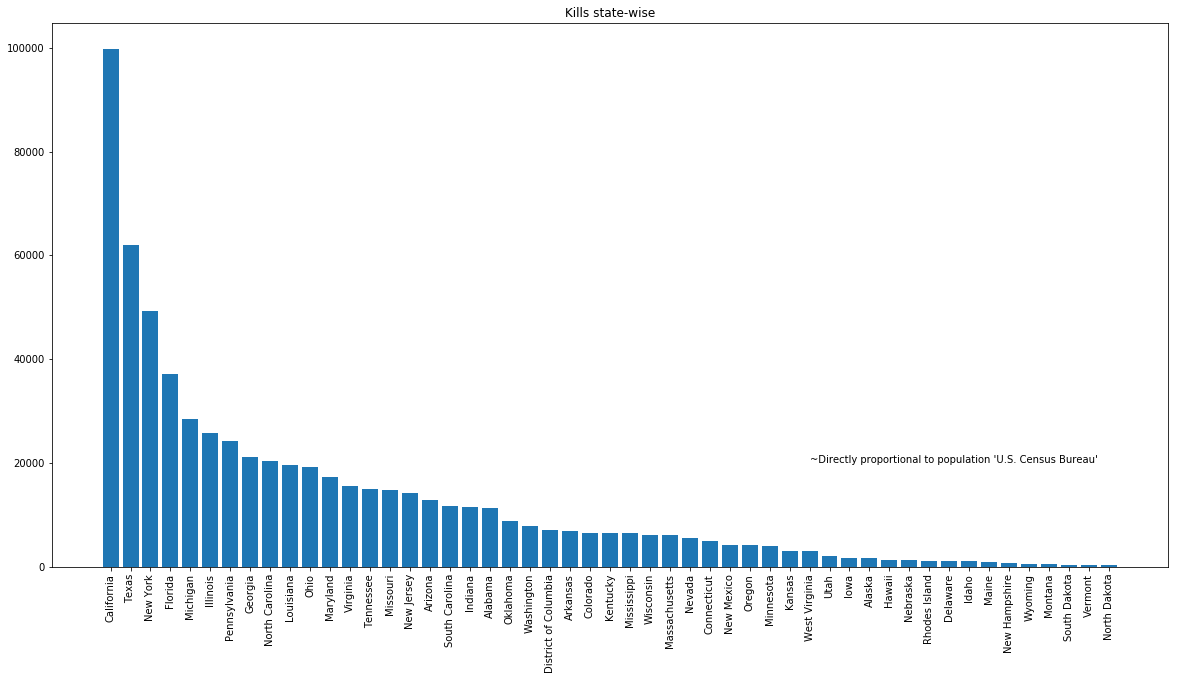

In [52]:
import pylab as pylt
hist = pd.DataFrame(df["State"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(51))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 10.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
pylt.title("Kills state-wise")
pylt.text(35,20000,"~Directly proportional to population 'U.S. Census Bureau'")
pylt.show()

In [53]:
f = pd.DataFrame(df["City"].value_counts())
f.head()

City
Los Angeles  44511
New York     38431
Cook         22383
Wayne        19904
Harris       16331

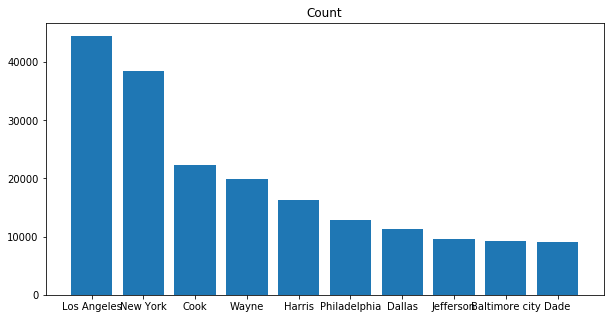

In [54]:
import pylab as pylt
hist = pd.DataFrame(df["City"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
hist = hist[:10]
hist
x = list(range(10))
labels = hist.index[:10]
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Count")
#pylt.text(5,200000,"Not sure what this is")
pylt.show()

# Population form other website

In [55]:
pop = pd.read_csv("/media/radial/Work/Work/Work on datasets/Serial killer detection/Pop.csv", header=None)
year = pop[1]
for i in range(len(year)):
    year[i] = str(year[i])[:5]
year

0      2014
1      2013
2      2012
3      2011
4      2010
5      2009
6      2008
7      2007
8      2006
9      2005
10     2004
11     2003
12     2002
13     2001
14     2000
15     1999
16     1998
17     1997
18     1996
19     1995
20     1994
21     1993
22     1992
23     1991
24     1990
25     1989
26     1988
27     1987
28     1986
29     1985
30     1984
31     1983
32     1982
33     1981
34     1980
Name: 1, dtype: object

In [56]:
pop = pd.read_csv("/media/radial/Work/Work/Work on datasets/Serial killer detection/Pop.csv", header=None)
population = pop[1]
for i in range(len(population)):
    population[i] = str(population[i])[7:10]
population

0     317
1     314
2     312
3     310
4     308
5     306
6     304
7     301
8     298
9     295
10    292
11    290
12    287
13    284
14    282
15    279
16    275
17    272
18    269
19    266
20    263
21    259
22    256
23    252
24    249
25    246
26    244
27    242
28    240
29    237
30    235
31    233
32    231
33    229
34    227
Name: 1, dtype: object

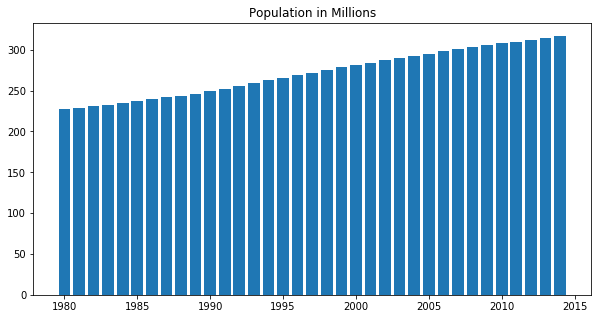

In [57]:
pylt.bar(year.astype(int), population.astype(int))
pylt.title("Population in Millions")

# Back to exploration

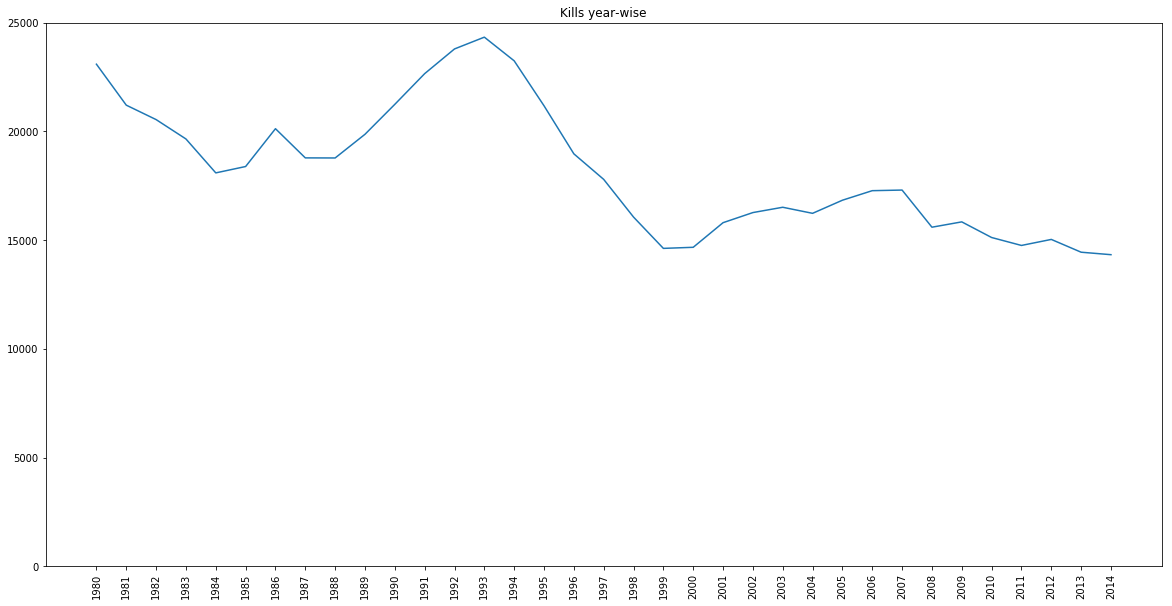

In [58]:
import pylab as pylt
hist_year = pd.DataFrame(df["Year"].value_counts())
hist_year.sort_index(inplace=True)
x = list(range(35))
labels = hist_year.index
pylt.rcParams['figure.figsize'] = (20.0, 10.0)
pylt.plot(x,hist_year.Year)
pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
pylt.title("Kills year-wise")
pylt.show()

In [59]:
f = pd.DataFrame(df["Month"].value_counts())
f.head()

Month
July       58696
August     58072
December   55187
September  54117
June       53662

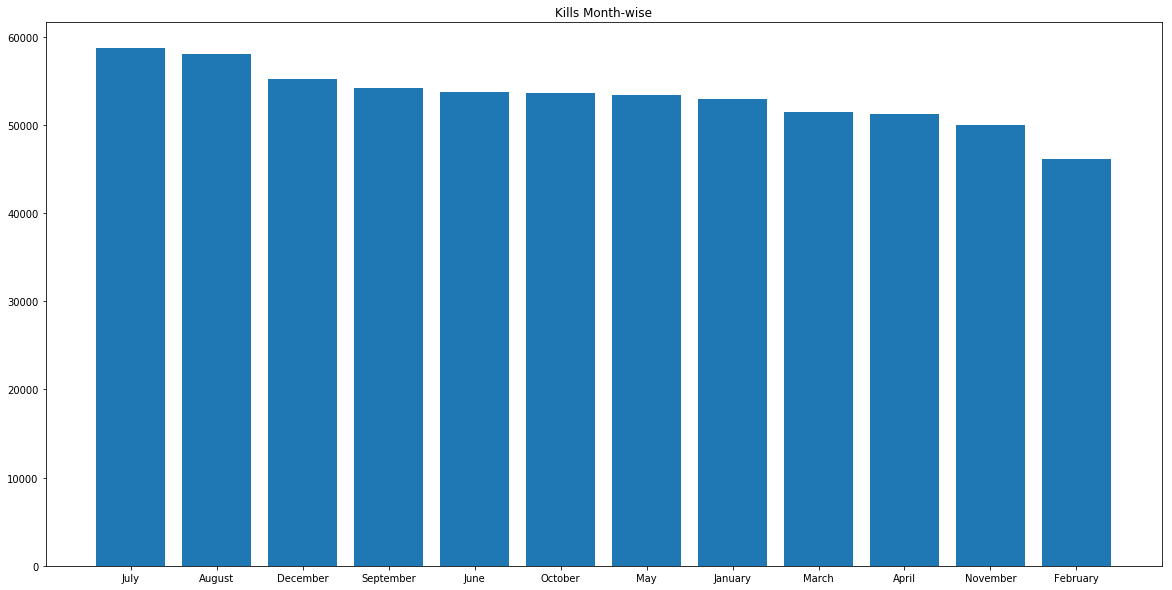

In [60]:
import pylab as pylt
hist = pd.DataFrame(df["Month"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(12))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 10.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Kills Month-wise")
pylt.show()

In [61]:
f = pd.DataFrame(df["Crime Type"].value_counts())
f.tail()

Crime Type
Murder or Manslaughter          629338
Manslaughter by Negligence        9116

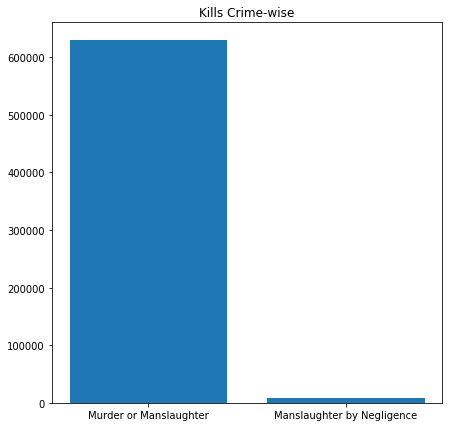

In [62]:
import pylab as pylt
hist = pd.DataFrame(df["Crime Type"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(2))
labels = hist.index
pylt.rcParams['figure.figsize'] = (7.0, 7.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Kills Crime-wise")
pylt.show()

In [63]:
f = pd.DataFrame(df["Crime Solved"].value_counts())
f.tail()

Crime Solved
Yes        448172
No         190282

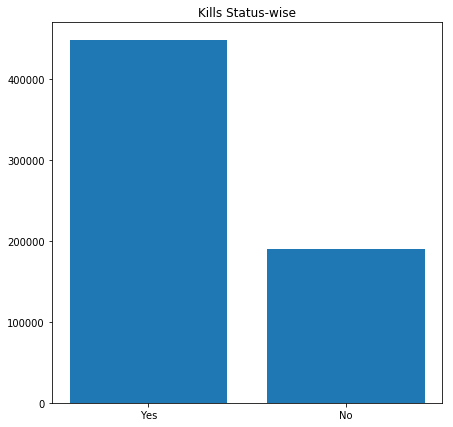

In [64]:
import pylab as pylt
hist = pd.DataFrame(df["Crime Solved"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(2))
labels = hist.index
pylt.rcParams['figure.figsize'] = (7.0, 7.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Kills Status-wise")
pylt.show()

In [65]:
f = pd.DataFrame(df["Victim Sex"].value_counts())
f.tail()

Victim Sex
Male         494125
Female       143345
Unknown         984

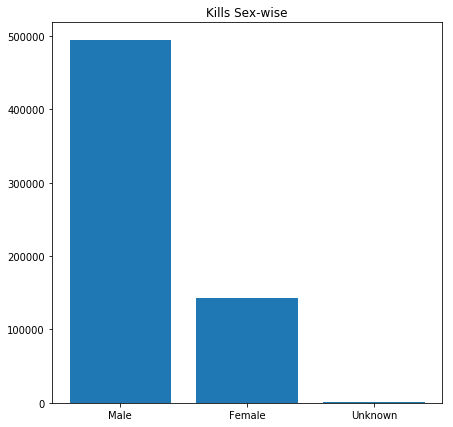

In [66]:
import pylab as pylt
hist = pd.DataFrame(df["Victim Sex"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (7.0, 7.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Kills Sex-wise")
pylt.show()

In [67]:
f = pd.DataFrame(df["Victim Age"].value_counts())
f.tail()

Victim Age
94         116
95          82
97          39
96          37
98          33

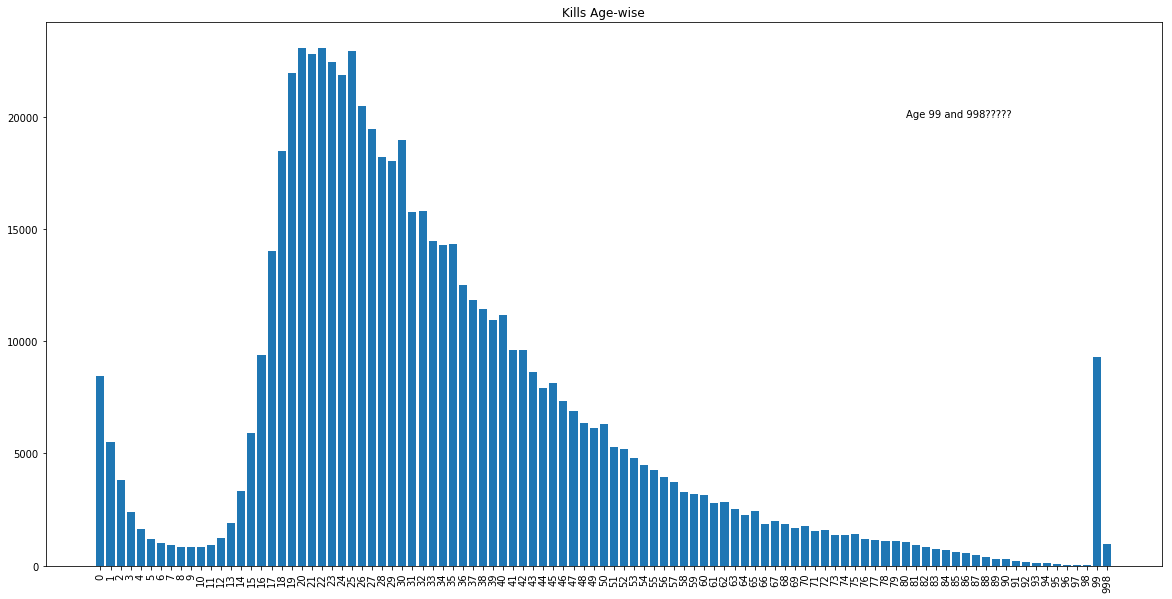

In [68]:
import pylab as pylt
hist = pd.DataFrame(df["Victim Age"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 10.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Kills Age-wise")
pylt.text(80,20000,"Age 99 and 998?????")
pylt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f9471498438>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9471467fd0>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7f9470fa1198>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9471496048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9471498748>,
  <matplotlib.lines.Line2D at 0x7f94714676d8>]}

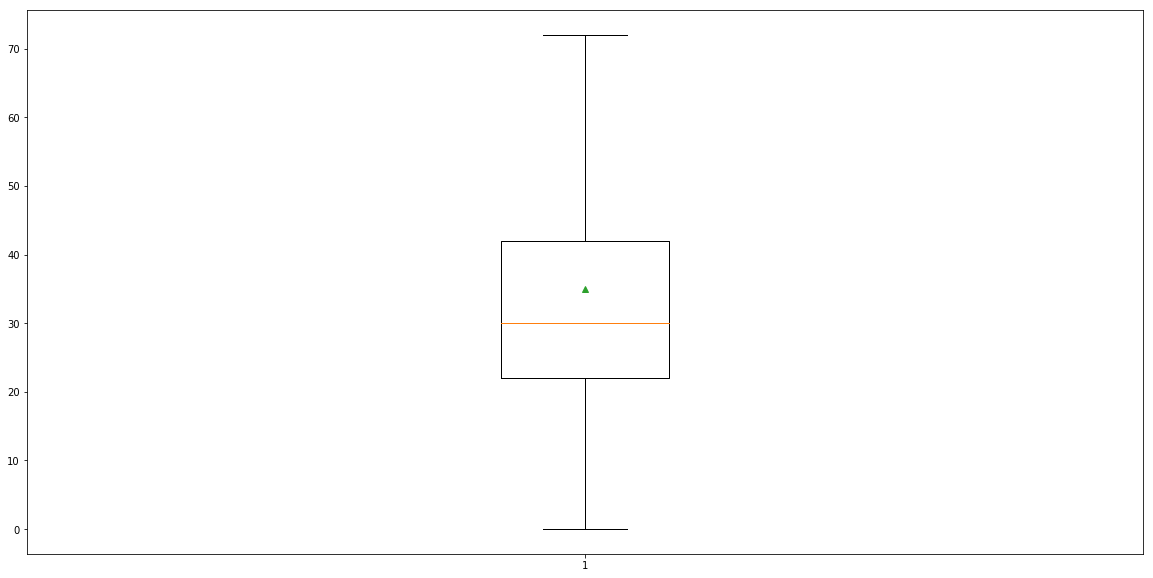

In [69]:
fig,ax = plt.subplots()
ax.boxplot(df["Victim Age"],showmeans=True, showfliers=False)

In [70]:
f = pd.DataFrame(df["Victim Race"].value_counts())
f.tail()

Victim Race
White                               317422
Black                               299899
Asian/Pacific Islander                9890
Unknown                               6676
Native American/Alaska Native         4567

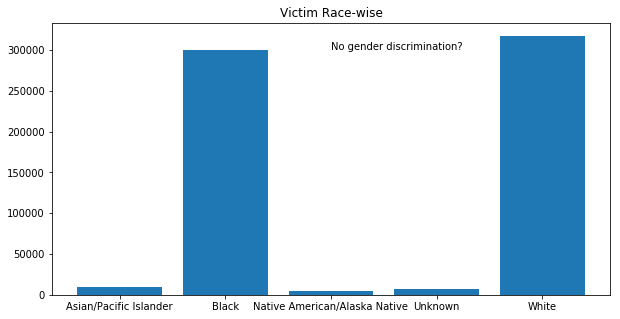

In [71]:
import pylab as pylt
hist = pd.DataFrame(df["Victim Race"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Victim Race-wise")
pylt.text(2,300000,"No gender discrimination?")
pylt.show()

In [72]:
f = pd.DataFrame(df["Victim Ethnicity"].value_counts())
f.tail()

Victim Ethnicity
Unknown                 368303
Not Hispanic            197499
Hispanic                 72652

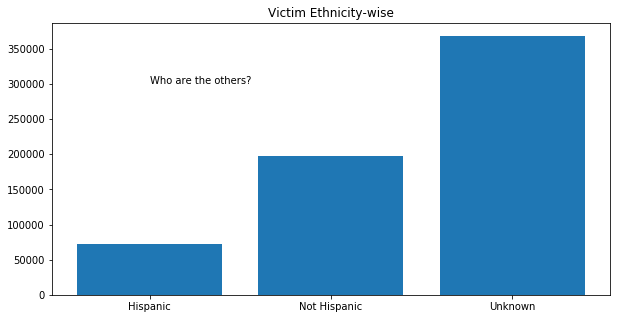

In [73]:
import pylab as pylt
hist = pd.DataFrame(df["Victim Ethnicity"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Victim Ethnicity-wise")
pylt.text(0,300000,"Who are the others?")
pylt.show()

In [74]:
f = pd.DataFrame(df["Perpetrator Age"].value_counts())

f.drop(" ", inplace=True)

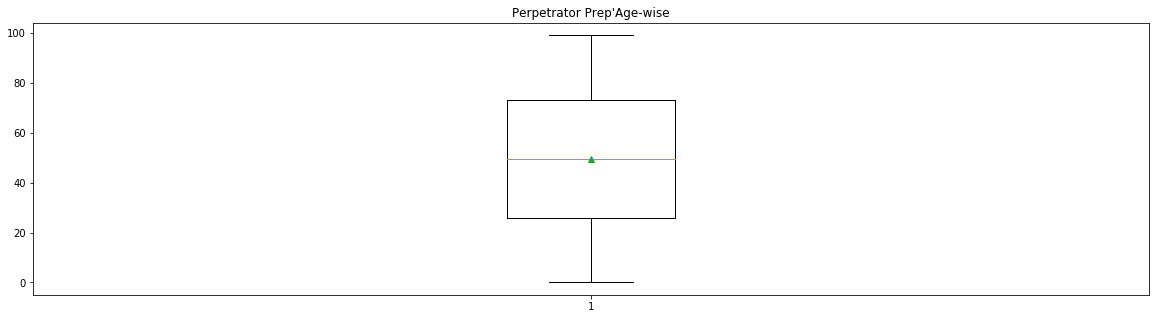

In [75]:
import pylab as pylt
hist = pd.DataFrame(df["Perpetrator Age"].value_counts())
hist.columns = ["Col"]
hist.drop(" ",inplace=True)
#hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 5.0)
pylt.boxplot(hist.index.astype(int), showfliers=False, showmeans=True)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Perpetrator Prep'Age-wise")
#pylt.text(0,300000,"Who are the others?")
pylt.show()

In [76]:
f = pd.DataFrame(df["Perpetrator Sex"].value_counts())
f.tail()

Perpetrator Sex
Male              399541
Unknown           190365
Female             48548

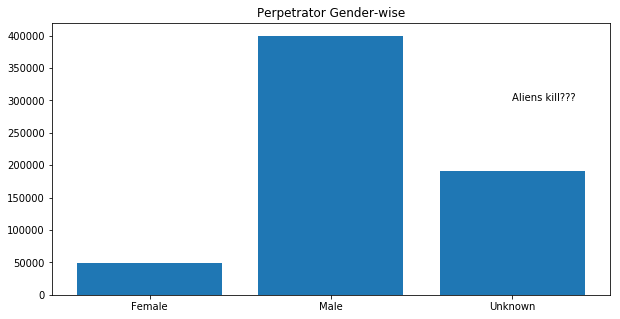

In [77]:
import pylab as pylt
hist = pd.DataFrame(df["Perpetrator Sex"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Perpetrator Gender-wise")
pylt.text(2,300000,"Aliens kill???")
pylt.show()

In [78]:
f = pd.DataFrame(df["Perpetrator Race"].value_counts())
f.tail()

Perpetrator Race
White                                    218243
Black                                    214516
Unknown                                  196047
Asian/Pacific Islander                     6046
Native American/Alaska Native              3602

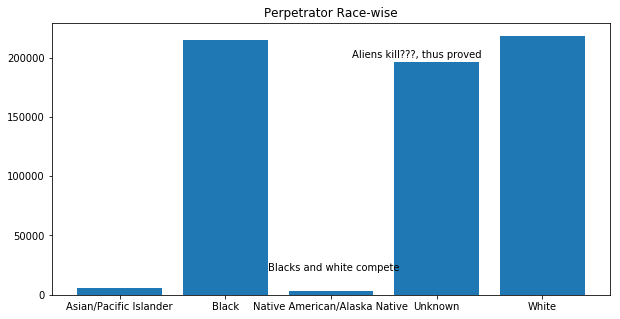

In [79]:
import pylab as pylt
hist = pd.DataFrame(df["Perpetrator Race"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Perpetrator Race-wise")
pylt.text(2.2,200000,"Aliens kill???, thus proved")
pylt.text(1.4,20000,"Blacks and white compete")
pylt.show()

In [80]:
f = pd.DataFrame(df["Perpetrator Ethnicity"].value_counts())
f.tail()

Perpetrator Ethnicity
Unknown                      446410
Not Hispanic                 145172
Hispanic                      46872

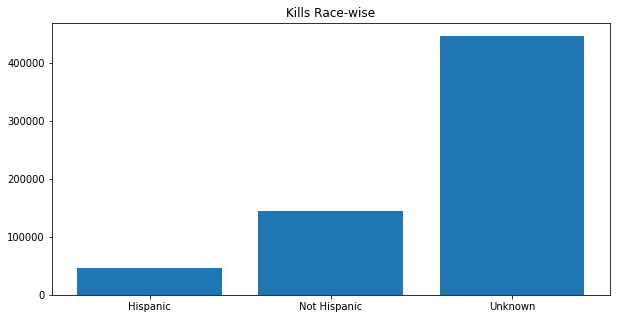

In [81]:
import pylab as pylt
hist = pd.DataFrame(df["Perpetrator Ethnicity"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Kills Race-wise")
#pylt.text(2.2,200000,"Aliens kill???, thus proved")
pylt.show()

In [82]:
f = pd.DataFrame(df["Relationship"].value_counts())
f.tail()

Relationship
Stepdaughter           754
Ex-Husband             629
Employer               509
Employee               384
Stepmother             211

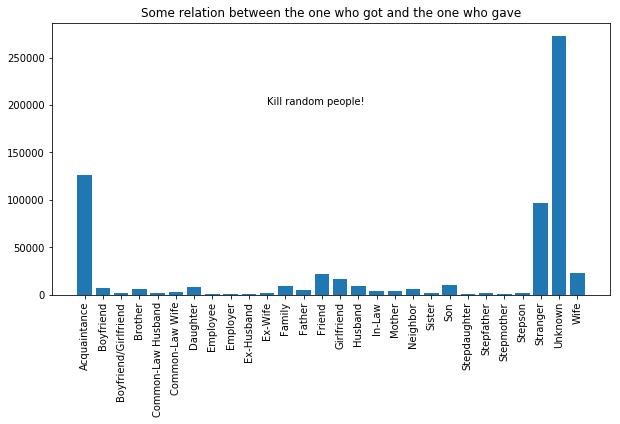

In [83]:
import pylab as pylt
hist = pd.DataFrame(df["Relationship"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Some relation between the one who got and the one who gave")
pylt.text(10,200000,"Kill random people!")
pylt.show()

In [84]:
f = pd.DataFrame(df["Weapon"].value_counts())
f.tail()

Weapon
Drugs         1588
Drowning      1204
Explosives     537
Poison         454
Fall           190

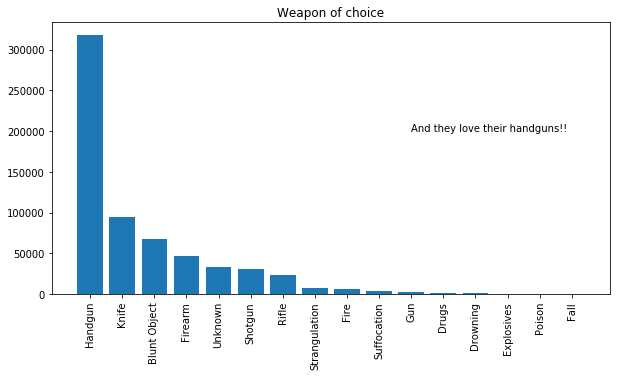

In [85]:
import pylab as pylt
hist = pd.DataFrame(df["Weapon"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Weapon of choice")
pylt.text(10,200000,"And they love their handguns!!")
pylt.show()

In [86]:
f = pd.DataFrame(df["Victim Count"].value_counts())
f.head()

Victim Count
0        586059
1         38750
2          8156
3          2847
4          1084

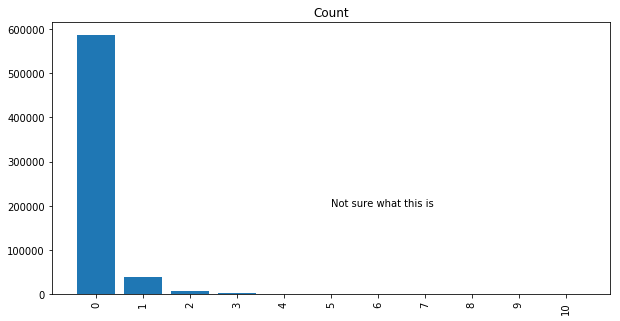

In [87]:
import pylab as pylt
hist = pd.DataFrame(df["Victim Count"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Count")
pylt.text(5,200000,"Not sure what this is")
pylt.show()

In [88]:
f = pd.DataFrame(df["Perpetrator Count"].value_counts())
f.head()

Perpetrator Count
0             558838
1              54745
2              15777
3               6531
4               1489

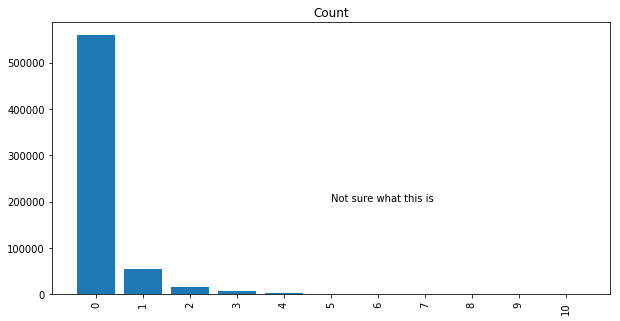

In [89]:
import pylab as pylt
hist = pd.DataFrame(df["Perpetrator Count"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Count")
pylt.text(5,200000,"Not sure what this is")
pylt.show()

In [90]:
f = pd.DataFrame(df["Record Source"].value_counts())
f.head()

Record Source
FBI          616647
FOIA          21807

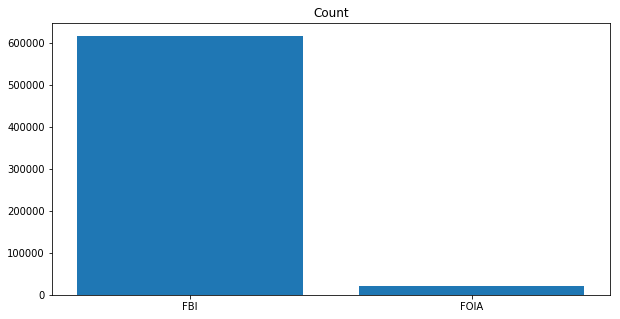

In [91]:
import pylab as pylt
hist = pd.DataFrame(df["Record Source"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
#pylt.xticks(x, labels, rotation='vertical')
pylt.xticks(x, labels)
pylt.title("Count")
#pylt.text(5,200000,"Not sure what this is")
pylt.show()

In [92]:
f = pd.DataFrame(df["Agency Type"].value_counts())
f.shape

(7, 1)

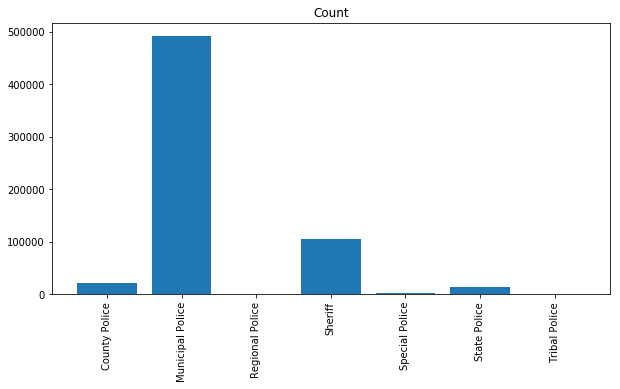

In [93]:
import pylab as pylt
hist = pd.DataFrame(df["Agency Type"].value_counts())
hist.columns = ["Col"]
hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (10.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Count")
#pylt.text(5,200000,"Not sure what this is")
pylt.show()

In [6]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [42]:
x = df["Perpetrator Age"]
#plt.hist(x.astype(int))
#x = x.map({" ":0})
#x.value_counts()
for i in range(len(x)):
    if (isinstance(x[i], str )):
        print(x[i])
        #x[i] = int(x[i])

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ValueError: invalid literal for int() with base 10: ' '

# Californication

In [94]:
cal = df[df['State'] == "California"]
cal.shape

(99783, 24)

In [95]:
f = pd.DataFrame(cal["City"].value_counts())
f.shape

(58, 1)

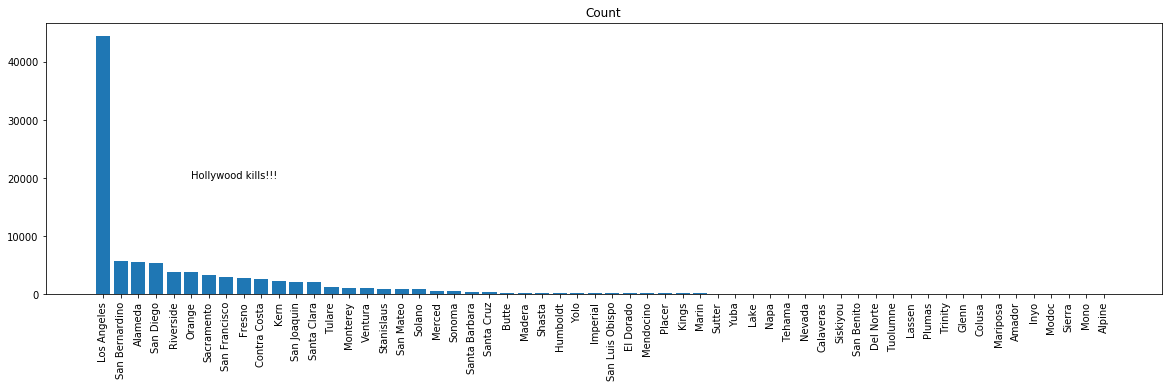

In [96]:
import pylab as pylt
hist = pd.DataFrame(cal["City"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Count")
pylt.text(5,20000,"Hollywood kills!!!")
pylt.show()

In [97]:
f = pd.DataFrame(cal["Weapon"].value_counts())
f.shape

(15, 1)

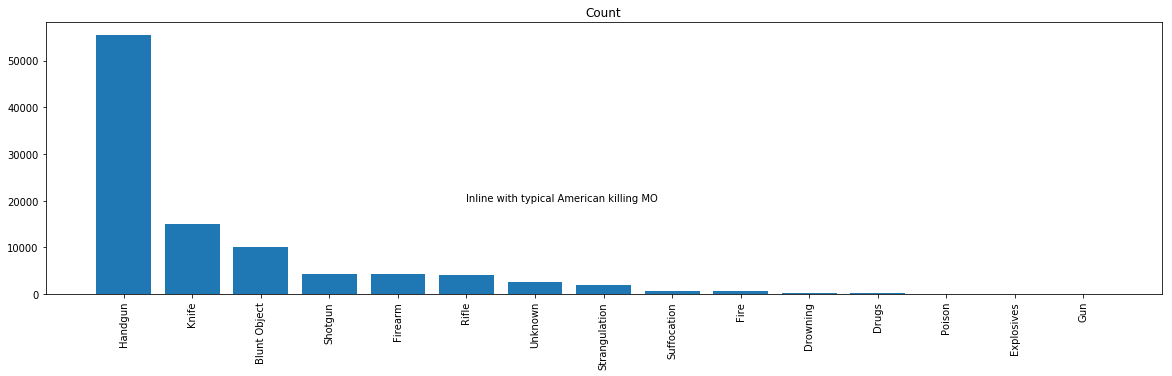

In [98]:
import pylab as pylt
hist = pd.DataFrame(cal["Weapon"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Count")
pylt.text(5,20000,"Inline with typical American killing MO")
pylt.show()

# Black concentration

In [99]:
black_vic = df[df["Victim Race"]=="Black"]
black_vic.shape

(299899, 24)

In [100]:
f = pd.DataFrame(black_vic["State"].value_counts())
f.shape

(51, 1)

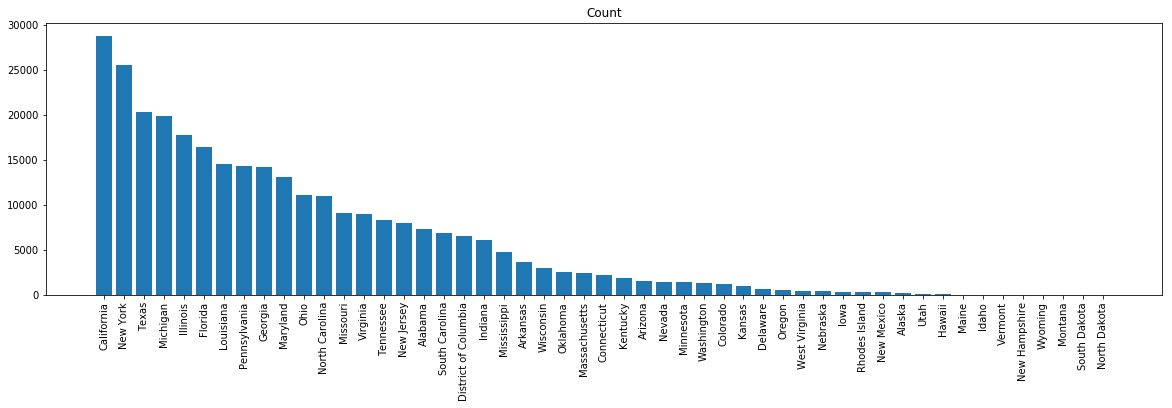

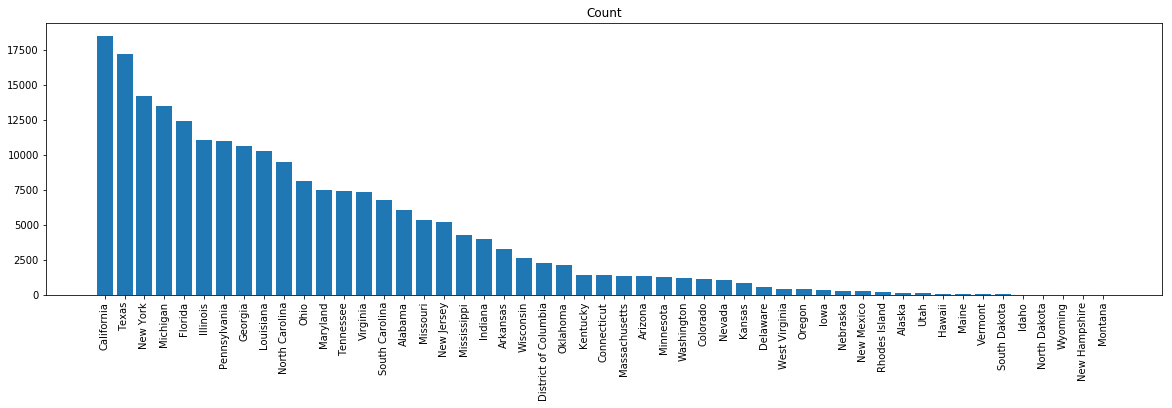

In [101]:
import pylab as pylt
hist = pd.DataFrame(black_vic["State"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Count")
#pylt.text(5,20000,"Inline with typical American killing MO")
pylt.show()

import pylab as pylt
hist = pd.DataFrame(black_per["State"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(f.shape[0]))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 5.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.xticks(x, labels)
pylt.title("Count")
#pylt.text(5,20000,"Inline with typical American killing MO")
pylt.show()

In [102]:
black_per = df[df["Perpetrator Race"]=="Black"]
black_per.shape

(214516, 24)

In [103]:
f = pd.DataFrame(black_per["State"].value_counts())
f.shape

(51, 1)

In [104]:
f["States"] = f.index
f.columns

Index(['State', 'States'], dtype='object')

In [105]:
f.head()

State      States
California  18500  California
Texas       17234       Texas
New York    14196    New York
Michigan    13468    Michigan
Florida     12406     Florida

In [106]:
f = f[["States","State"]]
f.columns = ["States","Number"]

In [107]:
f.States.shape

(51,)

In [108]:
f

States  Number
California                      California   18500
Texas                                Texas   17234
New York                          New York   14196
Michigan                          Michigan   13468
Florida                            Florida   12406
Illinois                          Illinois   11073
Pennsylvania                  Pennsylvania   10968
Georgia                            Georgia   10649
Louisiana                        Louisiana   10263
North Carolina              North Carolina    9523
Ohio                                  Ohio    8111
Maryland                          Maryland    7515
Tennessee                        Tennessee    7442
Virginia                          Virginia    7317
South Carolina              South Carolina    6754
Alabama                            Alabama    6059
Missouri                          Missouri    5363
New Jersey                      New Jersey    5190
Mississippi                    Mississippi    4274
Indiana                            Indiana    3964
Arkansas                          Arkansas    3279
Wisconsin                        Wisconsin    2631
District of Columbia  District of Columbia    2238
Oklahoma                          Oklahoma    2161
Kentucky                          Kentucky    1446
Connecticut                    Connecticut    1425
Massachusetts                Massachusetts    1353
Arizona                            Arizona    1320
Minnesota                        Minnesota    1256
Washington                      Washington    1167
Colorado                          Colorado    1107
Nevada                              Nevada    1031
Kansas                              Kansas     877
Delaware                          Delaware     543
West Virginia                West Virginia     418
Oregon                              Oregon     411
Iowa                                  Iowa     326
Nebraska                          Nebraska     295
New Mexico                      New Mexico     258
Rhodes Island                Rhodes Island     228
Alaska                              Alaska     142
Utah                                  Utah     117
Hawaii                              Hawaii      55
Maine                                Maine      39
Vermont                            Vermont      26
South Dakota                  South Dakota      23
Idaho                                Idaho      21
North Dakota                  North Dakota      16
Wyoming                            Wyoming      15
New Hampshire                New Hampshire      12
Montana                            Montana      11

# MAP number of cases state-wise

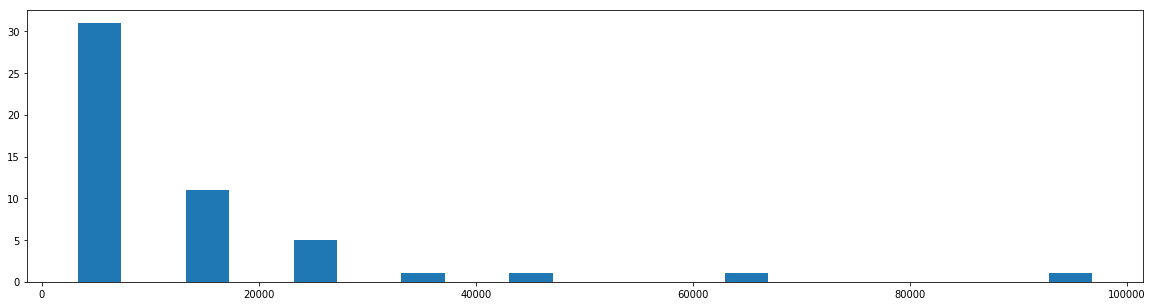

In [109]:
import pylab as pylt
hist_state = pd.DataFrame(df.State.value_counts())
x = list(range(51))
labels = hist_state.index
pylt.hist(hist_state.State, rwidth=0.4 )
pylt.show()

In [9]:
data

[{'autocolorscale': False,
  'colorbar': {'title': 'Number of cases'},
  'colorscale': [[900, 'rgb(242,240,247)'],
   [1500, 'rgb(218,218,235)'],
   [4000, 'rgb(188,189,220)'],
   [9000, 'rgb(158,154,200)'],
   [20000, 'rgb(117,107,177)'],
   [40000, 'rgb(84,39,143)']],
  'locationmode': 'USA-states',
  'locations': 0                Alaska
  1                Alaska
  2                Alaska
  3                Alaska
  4                Alaska
  5                Alaska
  6                Alaska
  7                Alaska
  8                Alaska
  9                Alaska
  10               Alaska
  11               Alaska
  12               Alaska
  13               Alaska
  14               Alaska
  15               Alaska
  16               Alaska
  17               Alaska
  18               Alaska
  19               Alaska
  20               Alaska
  21               Alaska
  22               Alaska
  23               Alaska
  24               Alaska
  25               Alaska
  26    

In [10]:
?py

In [11]:
data

[{'autocolorscale': False,
  'colorbar': {'title': 'Number of cases'},
  'colorscale': [[900, 'rgb(242,240,247)'],
   [1500, 'rgb(218,218,235)'],
   [4000, 'rgb(188,189,220)'],
   [9000, 'rgb(158,154,200)'],
   [20000, 'rgb(117,107,177)'],
   [40000, 'rgb(84,39,143)']],
  'locationmode': 'USA-states',
  'locations': 0                Alaska
  1                Alaska
  2                Alaska
  3                Alaska
  4                Alaska
  5                Alaska
  6                Alaska
  7                Alaska
  8                Alaska
  9                Alaska
  10               Alaska
  11               Alaska
  12               Alaska
  13               Alaska
  14               Alaska
  15               Alaska
  16               Alaska
  17               Alaska
  18               Alaska
  19               Alaska
  20               Alaska
  21               Alaska
  22               Alaska
  23               Alaska
  24               Alaska
  25               Alaska
  26    

In [116]:
import plotly.plotly as py
scl = [[900, 'rgb(242,240,247)'],[1500, 'rgb(218,218,235)'],[4000, 'rgb(188,189,220)'],\
            [9000, 'rgb(158,154,200)'],[20000, 'rgb(117,107,177)'],[40000, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = f.States,
        z = f.Number,
        locationmode = 'USA-states',
        #text = hist_state.index[1:100],
        marker = dict(
            line = dict (
                color = 'rgb(0,0,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of cases")
        ) ]
layout = dict(
        title = 'Number of cases',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~majindamani/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
